# 0. Data
## 0.1. Import "listing.csv.gs"

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics 
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
listing = pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2022-09-11/data/listings.csv.gz")
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20220911230855,2022-09-12,city scrape,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a day,100%,86%,f,https://a0.muscache.com/im/pictures/user/79a63...,https://a0.muscache.com/im/pictures/user/79a63...,Hispanoamérica,1.0,1.0,"['email', 'phone']",t,t,NaN,Hispanoamérica,Chamartín,40.45724,-3.67688,Private room in rental unit,Private room,2,NaN,1 private bath,1.0,1.0,"[""Coffee maker"", ""Dishwasher"", ""Cleaning produ...",$77.00,3,1125,3,21,1125,1125,5.5,1125.0,NaN,t,0,26,56,56,2022-09-12,99,19,0,2010-03-14,2022-07-08,4.87,4.90,4.82,4.75,4.85,4.82,4.85,NaN,f,1,0,1,0,0.65
1,21853,https://www.airbnb.com/rooms/21853,20220911230855,2022-09-12,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,0%,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",Cármenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Coffee maker"", ""Bed linens"", ""Washer...",$31.00,4,40,4,4,40,40,4.0,40.0,NaN,t,0,1,1,255,2022-09-12,33,0,0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.34
2,24805,https://www.airbnb.com/rooms/24805,20220911230855,2022-09-12,city scrape,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,Alvaro,2020-05-15,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/d3167...,https://a0.muscache.com/im/pictures/user/d3167...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Madrid, Spain",Universidad,Centro,40.42183,-3.70529,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Wifi"", ""Coffee maker"", ""Washer"", ""Cleaning b...",$92.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,1,5,5,80,2022-09-12,24,12,1,2014-11-29,2022-08-25,4.88,4.88,4.83,5.00,5.00,5.00,4.83,NaN,f,1,1,0,0,0.25
3,26825,https://www.airbnb.com/rooms/26825,20220911230855,2022-09-12,city scrape,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es

## 0.2. Drop Useless Columns

we wanted to carry as many values as possible, so we dropped columns that are not included in test.xlsx and has too many category columns

In [4]:
test_raw = pd.read_excel("test.xlsx")
test_raw.head(2)

,No,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,NaN,within an hour,100%,72%,1,1,t,t,Entire condo,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Shower gel"", ""Hangers"", ""43\"" HDTV"", ""Cookin...",$68.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,22,52,82,357,2022-09-20,6,6,1,2022-04-16,2022-09-12,5.0,4.83,5.0,5.0,5.0,5.0,5.0,f,1,1,0,0,1.14
1,2,NaN,within an hour,100%,100%,21,21,t,t,Entire serviced apartment,Entire home/apt,5,NaN,2 baths,2.0,3.0,"[""Hot water kettle"", ""Shower gel"", ""Hangers"", ...",$95.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,8,18,46,317,2022-09-20,2,2,0,2022-05-31,2022-08-06,5.0,5.00,5.0,5.0,5.0,5.0,5.0,t,21,21,0,0,0.53


In [5]:
listing_drop = listing[['host_is_superhost','host_response_time','host_response_rate', 'host_acceptance_rate', 
                        'host_listings_count','host_total_listings_count','host_has_profile_pic','host_identity_verified', 
                        'accommodates','bathrooms', 'bedrooms','beds','price',
                        'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                        'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                        'has_availability','availability_30','availability_60','availability_90','availability_365',
                        'calendar_last_scraped','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d',
                        'first_review','last_review','review_scores_rating','review_scores_accuracy',
                        'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                        'review_scores_location','review_scores_value','instant_bookable','calculated_host_listings_count',
                        'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms','reviews_per_month' ]]
listing_drop.head(2)

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,f,within a day,100%,86%,1.0,1.0,t,t,2,NaN,1.0,1.0,$77.00,3,1125,3,21,1125,1125,5.5,1125.0,t,0,26,56,56,2022-09-12,99,19,0,2010-03-14,2022-07-08,4.87,4.90,4.82,4.75,4.85,4.82,4.85,f,1,0,1,0,0.65
1,f,NaN,NaN,0%,2.0,2.0,t,t,1,NaN,1.0,1.0,$31.00,4,40,4,4,40,40,4.0,40.0,t,0,1,1,255,2022-09-12,33,0,0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,f,2,0,2,0,0.34


## 0.3. Categorical to Numerical

In [6]:
listing_drop['host_is_superhost'].replace(['f', 't'],
        [0,1], inplace=True)

listing_drop['host_has_profile_pic'].replace(['f', 't'],
        [0,1], inplace=True)

listing_drop['host_identity_verified'].replace(['f', 't'],
        [0,1], inplace=True)

listing_drop['has_availability'].replace(['f', 't'],
        [0,1], inplace=True)

listing_drop['instant_bookable'].replace(['f', 't'],
        [0,1], inplace=True)

listing_drop['host_response_time'].replace(['within a day', 'within a few hours','within an hour','a few days or more'],
        [0,1,2,3], inplace=True)

listing_drop.head(2)

C:\Users\winne\AppData\Local\Temp\ipykernel_22072\3211813404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop['host_is_superhost'].replace(['f', 't'],
C:\Users\winne\AppData\Local\Temp\ipykernel_22072\3211813404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop['host_has_profile_pic'].replace(['f', 't'],
C:\Users\winne\AppData\Local\Temp\ipykernel_22072\3211813404.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,0.0,100%,86%,1.0,1.0,1.0,1.0,2,NaN,1.0,1.0,$77.00,3,1125,3,21,1125,1125,5.5,1125.0,1,0,26,56,56,2022-09-12,99,19,0,2010-03-14,2022-07-08,4.87,4.90,4.82,4.75,4.85,4.82,4.85,0,1,0,1,0,0.65
1,0.0,NaN,NaN,0%,2.0,2.0,1.0,1.0,1,NaN,1.0,1.0,$31.00,4,40,4,4,40,40,4.0,40.0,1,0,1,1,255,2022-09-12,33,0,0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,0,2,0,2,0,0.34


## 0.4. Datatype

In [7]:
data = {'column name' : listing_drop.columns, 'dtypes' : listing_drop.dtypes.to_list()}
df = pd.DataFrame(data)
print(df)

                                     column name   dtypes
0                              host_is_superhost  float64
1                             host_response_time  float64
2                             host_response_rate   object
3                           host_acceptance_rate   object
4                            host_listings_count  float64
5                      host_total_listings_count  float64
6                           host_has_profile_pic  float64
7                         host_identity_verified  float64
8                                   accommodates    int64
9                                      bathrooms  float64
10                                      bedrooms  float64
11                                          beds  float64
12                                         price   object
13                                minimum_nights    int64
14                                maximum_nights    int64
15                        minimum_minimum_nights    int64
16            

In [8]:
listing_drop["host_response_rate"] = listing_drop["host_response_rate"].str.strip("%")
listing_drop["host_acceptance_rate"] = listing_drop["host_acceptance_rate"].str.strip("%")

C:\Users\winne\AppData\Local\Temp\ipykernel_22072\3272187367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop["host_response_rate"] = listing_drop["host_response_rate"].str.strip("%")
C:\Users\winne\AppData\Local\Temp\ipykernel_22072\3272187367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop["host_acceptance_rate"] = listing_drop["host_acceptance_rate"].str.strip("%")


In [9]:
listing_drop["host_response_rate"] = listing_drop["host_response_rate"].astype(float)
listing_drop["host_acceptance_rate"] = listing_drop["host_acceptance_rate"].astype(float)

C:\Users\winne\AppData\Local\Temp\ipykernel_22072\3401228386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop["host_response_rate"] = listing_drop["host_response_rate"].astype(float)
C:\Users\winne\AppData\Local\Temp\ipykernel_22072\3401228386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop["host_acceptance_rate"] = listing_drop["host_acceptance_rate"].astype(float)


In [10]:
import re 
def re_sub(x):
    for i in x:
        return float(re.sub(r'[$,]',"",str(x)))  
listing_drop["price"] =  listing_drop["price"].apply(re_sub)

C:\Users\winne\AppData\Local\Temp\ipykernel_22072\1049738533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop["price"] =  listing_drop["price"].apply(re_sub)


In [11]:
listing_drop['calendar_last_scraped'] = pd.to_datetime(listing_drop['calendar_last_scraped'])
today = pd.to_datetime('today').normalize()


days=[]
for i in range(0,len(listing_drop['calendar_last_scraped'])):
    delta= today - listing_drop['calendar_last_scraped'][i]
    days.append(delta)

listing_drop = pd.concat([listing_drop, pd.DataFrame(days, columns=["calendar_last_scraped_days_past"])], axis=1)
listing_drop["calendar_last_scraped_days_past"]= listing_drop["calendar_last_scraped_days_past"].astype('timedelta64[D]')
listing_drop.drop(['calendar_last_scraped'], axis=1, inplace = True)

C:\Users\winne\AppData\Local\Temp\ipykernel_22072\30714263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_drop['calendar_last_scraped'] = pd.to_datetime(listing_drop['calendar_last_scraped'])


In [12]:
listing_drop['first_review'] = pd.to_datetime(listing_drop['first_review'])
today = pd.to_datetime('today').normalize()


days=[]
for i in range(0,len(listing_drop['first_review'])):
    delta= today - listing_drop['first_review'][i]
    days.append(delta)

listing_drop = pd.concat([listing_drop, pd.DataFrame(days, columns=["first_review_days_past"])], axis=1)
listing_drop["first_review_days_past"]= listing_drop["first_review_days_past"].astype('timedelta64[D]')
listing_drop.drop(['first_review'], axis=1, inplace = True)

In [13]:
listing_drop['last_review'] = pd.to_datetime(listing_drop['last_review'])
today = pd.to_datetime('today').normalize()


days=[]
for i in range(0,len(listing_drop['last_review'])):
    delta= today - listing_drop['last_review'][i]
    days.append(delta)

listing_drop = pd.concat([listing_drop, pd.DataFrame(days, columns=["last_reviews_days_past"])], axis=1)
listing_drop["last_reviews_days_past"]= listing_drop["last_reviews_days_past"].astype('timedelta64[D]')
listing_drop.drop(['last_review'], axis=1, inplace = True)

In [14]:
listing_train = listing_drop

In [15]:
data = {'column name' : listing_train.columns, 'dtypes' : listing_train.dtypes.to_list()}
df = pd.DataFrame(data)
print(df)

                                     column name   dtypes
0                              host_is_superhost  float64
1                             host_response_time  float64
2                             host_response_rate  float64
3                           host_acceptance_rate  float64
4                            host_listings_count  float64
5                      host_total_listings_count  float64
6                           host_has_profile_pic  float64
7                         host_identity_verified  float64
8                                   accommodates    int64
9                                      bathrooms  float64
10                                      bedrooms  float64
11                                          beds  float64
12                                         price  float64
13                                minimum_nights    int64
14                                maximum_nights    int64
15                        minimum_minimum_nights    int64
16            

## 0.5. Missing Value Check

In [16]:
listing_train.head()

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calendar_last_scraped_days_past,first_review_days_past,last_reviews_days_past
0,0.0,0.0,100.0,86.0,1.0,1.0,1.0,1.0,2,NaN,1.0,1.0,77.0,3,1125,3,21,1125,1125,5.5,1125.0,1,0,26,56,56,99,19,0,4.87,4.90,4.82,4.75,4.85,4.82,4.85,0,1,0,1,0,0.65,85.0,4650.0,151.0
1,0.0,NaN,NaN,0.0,2.0,2.0,1.0,1.0,1,NaN,1.0,1.0,31.0,4,40,4,4,40,40,4.0,40.0,1,0,1,1,255,33,0,0,4.58,4.72,4.56,4.75,4.82,4.21,4.67,0,2,0,2,0,0.34,85.0,2979.0,1605.0
2,0.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,3,NaN,NaN,1.0,92.0,5,1125,5,5,1125,1125,5.0,1125.0,1,1,5,5,80,24,12,1,4.88,4.88,4.83,5.00,5.00,5.00,4.83,0,1,1,0,0,0.25,85.0,2929.0,103.0
3,0.0,1.0,92.0,74.0,1.0,4.0,1.0,1.0,1,NaN,1.0,1.0,26.0,2,1125,2,2,1125,1125,2.0,1125.0,1,12,34,64,339,166,17,1,4.70,4.82,4.93,4.80,4.73,4.73,4.74,0,1,0,1,0,1.10,85.0,4593.0,93.0
4,1.0,2.0,100.0,99.0,1.0,1.0,1.0,1.0,2,NaN,1.0,1.0,49.0,2,90,2,2,1125,1125,2.0,1125.0,1,2,9,18,271,475,65,4,4.55,4.55,4.57,4.69,4.79,4.97,4.52,0,1,0,1,0,3.74,85.0,3890.0,90.0


In [17]:
listing_train.isnull().sum()

host_is_superhost                                   5
host_response_time                               4889
host_response_rate                               4889
host_acceptance_rate                             4401
host_listings_count                                 3
host_total_listings_count                           3
host_has_profile_pic                                3
host_identity_verified                              3
accommodates                                        0
bathrooms                                       20681
bedrooms                                         1454
beds                                              350
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights      

In [18]:
hrr_mean = listing_train["host_response_time"].mean()
listing_train["host_response_time"].fillna(hrr_mean, inplace = True)

hrr2_mean = listing_train["host_response_rate"].mean()
listing_train["host_response_rate"].fillna(hrr2_mean, inplace = True)

har_mean = listing_train["host_acceptance_rate"].mean()
listing_train["host_acceptance_rate"].fillna(har_mean, inplace = True)

hlc_mean = listing_train["host_listings_count"].mean()
listing_train["host_listings_count"].fillna(hlc_mean, inplace = True)

htlc_mean = listing_train["host_total_listings_count"].mean()
listing_train["host_total_listings_count"].fillna(htlc_mean, inplace = True)

hhpp_mean = listing_train["host_has_profile_pic"].mean()
listing_train["host_has_profile_pic"].fillna(hhpp_mean, inplace = True)

hiv_mean = listing_train["host_identity_verified"].mean()
listing_train["host_identity_verified"].fillna(hiv_mean, inplace = True)

bedr_mean = listing_train["bedrooms"].mean()
listing_train["bedrooms"].fillna(bedr_mean, inplace = True)

beds_mean = listing_train["beds"].mean()
listing_train["beds"].fillna(beds_mean, inplace = True)

rsr_mean = listing_train["review_scores_rating"].mean()
listing_train["review_scores_rating"].fillna(rsr_mean, inplace = True)

rsa_mean = listing_train["review_scores_accuracy"].mean()
listing_train["review_scores_accuracy"].fillna(rsa_mean, inplace = True)

rsc_mean = listing_train["review_scores_cleanliness"].mean()
listing_train["review_scores_cleanliness"].fillna(rsc_mean, inplace = True)

rsci_mean = listing_train["review_scores_checkin"].mean()
listing_train["review_scores_checkin"].fillna(rsci_mean, inplace = True)
                                              
rscm_mean = listing_train["review_scores_communication"].mean()
listing_train["review_scores_communication"].fillna(rscm_mean, inplace = True)
                                              
rsl_mean = listing_train["review_scores_location"].mean()
listing_train["review_scores_location"].fillna(rsl_mean, inplace = True)
                                              
rsv_mean = listing_train["review_scores_value"].mean()
listing_train["review_scores_value"].fillna(rsv_mean, inplace = True)
                                              
rpm_mean = listing_train["reviews_per_month"].mean()
listing_train["reviews_per_month"].fillna(rpm_mean, inplace = True)
                                              
frdp_mean = listing_train["first_review_days_past"].mean()
listing_train["first_review_days_past"].fillna(frdp_mean, inplace = True)
                                              
lrdp_mean = listing_train["last_reviews_days_past"].mean()
listing_train["last_reviews_days_past"].fillna(lrdp_mean, inplace = True)

In [19]:
listing_train.isnull().sum()

host_is_superhost                                   5
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
accommodates                                        0
bathrooms                                       20681
bedrooms                                            0
beds                                                0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights      

"bathroom" has any value, so drop it

In [20]:
listing_train = listing_train.drop(labels = ['bathrooms'], axis = 1)

and drop null value in "host_is_superhost" 

In [21]:
listing_train.dropna(inplace = True)

In [22]:
listing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20676 entries, 0 to 20680
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             20676 non-null  float64
 1   host_response_time                            20676 non-null  float64
 2   host_response_rate                            20676 non-null  float64
 3   host_acceptance_rate                          20676 non-null  float64
 4   host_listings_count                           20676 non-null  float64
 5   host_total_listings_count                     20676 non-null  float64
 6   host_has_profile_pic                          20676 non-null  float64
 7   host_identity_verified                        20676 non-null  float64
 8   accommodates                                  20676 non-null  int64  
 9   bedrooms                                      20676 non-null 

# 1. Preprocessing
## 1.1. Balancing the Data 

In [23]:
listing_train["host_is_superhost"].value_counts()

0.0    16912
1.0     3764
Name: host_is_superhost, dtype: int64

In [24]:
listing_train0 = listing_train[listing_train["host_is_superhost"] == 0]
listing_train1 = listing_train[listing_train["host_is_superhost"] == 1]

In [25]:
listing_train1_upsampled = resample(listing_train1, replace=True, n_samples=16912, random_state=0)

In [26]:
listing_train_upsampled = pd.concat([listing_train0, listing_train1_upsampled], axis=0)

In [27]:
listing_train_upsampled["host_is_superhost"].value_counts()

0.0    16912
1.0    16912
Name: host_is_superhost, dtype: int64

## 1.2. Defining Y & X

In [28]:
data = {'column name' : listing_train_upsampled.columns}
df = pd.DataFrame(data)
print(df)

                                     column name
0                              host_is_superhost
1                             host_response_time
2                             host_response_rate
3                           host_acceptance_rate
4                            host_listings_count
5                      host_total_listings_count
6                           host_has_profile_pic
7                         host_identity_verified
8                                   accommodates
9                                       bedrooms
10                                          beds
11                                         price
12                                minimum_nights
13                                maximum_nights
14                        minimum_minimum_nights
15                        maximum_minimum_nights
16                        minimum_maximum_nights
17                        maximum_maximum_nights
18                        minimum_nights_avg_ntm
19                  

In [29]:
y = listing_train.iloc[:, 0]
x = listing_train.iloc[:, 1:]

## 1.3. Scaling

In [30]:
scaler = StandardScaler()

In [31]:
scaler_model = scaler.fit(x)

In [32]:
scaled_x = scaler_model.transform(x)

# 2. Models
## 2.1. Choose Optimal Models

In [33]:
models = []

lr = LogisticRegression()
models.append(("LR", lr))

dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5) #or giny
models.append(("DT", dtc))

rfc = RandomForestClassifier(n_estimators = 20, random_state = 0)
models.append(("RF", rfc))

nnc = MLPClassifier(activation = "relu", hidden_layer_sizes = (6), max_iter = 1200000, random_state = 0 )# y is bianry output is one , 9+1/2 = lead into rule of thumb
models.append(("ANN", nnc))

svm = SVC(kernel = "rbf", C = 1, gamma = 1)
models.append(("SVM", svm))

In [34]:
models

[('LR', LogisticRegression()),
 ('DT', DecisionTreeClassifier(criterion='entropy', max_depth=5)),
 ('RF', RandomForestClassifier(n_estimators=20, random_state=0)),
 ('ANN',
  MLPClassifier(hidden_layer_sizes=6, max_iter=1200000, random_state=0)),
 ('SVM', SVC(C=1, gamma=1))]

In [35]:
for name, model in models:
    scores = cross_val_score(model, scaled_x, y, cv=5)
    mean = np.mean(scores)
    std = np.std(scores)
    print(name, ": ", mean, "(", std, ")")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR :  0.8496811901983119 ( 0.02175474894787541 )
DT :  0.8636095486236988 ( 0.01911574010275381 )
RF :  0.877297799835812 ( 0.013182730588007346 )
ANN :  0.8718807930601391 ( 0.012224011877669947 )
SVM :  0.8201781040745253 ( 0.002067494591998486 )


Decision Tree and Random Forest shows good validation scores, So we analyze them more deeply

## 2.2. Optimal Model Analysis


In [33]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size = 0.3, random_state = 0)

### 2.2.1. Decision Tree

In [37]:
nums = range(1,44)
for n in nums:
    dtc = DecisionTreeClassifier(criterion="entropy",max_depth = n)
    dtc_model = dtc.fit(x_train,y_train)
    y_pred = dtc_model.predict(x_test)
    score = metrics.accuracy_score(y_test,y_pred)
    print(n, ": ", score)

1 :  0.8181525068515234
2 :  0.8392713203288731
3 :  0.8640980170885055
4 :  0.8623246816056747
5 :  0.872481057552797
6 :  0.8790907625342577
7 :  0.8819925842334354
8 :  0.8805416733838465
9 :  0.8798968241173626
10 :  0.8798968241173626
11 :  0.8757053038852168
12 :  0.8755440915685958
13 :  0.8737707560857649
14 :  0.872319845236176
15 :  0.8650652909882315
16 :  0.8629695308721587
17 :  0.8623246816056747
18 :  0.8645816540383685
19 :  0.8647428663549895
20 :  0.8649040786716106
21 :  0.8653877156214734
22 :  0.8621634692890536
23 :  0.8636143801386426
24 :  0.8629695308721587
25 :  0.8624858939222957
26 :  0.8618410446558117
27 :  0.8626471062389166
28 :  0.8615186200225697
29 :  0.8607125584394648
30 :  0.8613574077059487
31 :  0.8616798323391908
32 :  0.8602289214896018
33 :  0.8597452845397389
34 :  0.8594228599064968
35 :  0.8639368047718846
36 :  0.8626471062389166
37 :  0.8621634692890536
38 :  0.8618410446558117
39 :  0.8636143801386426
40 :  0.8600677091729808
41 :  0.858

I changed criterion to gini

In [38]:
nums = range(1,44)
for n in nums:
    dtc = DecisionTreeClassifier(criterion="gini",max_depth = n)
    dtc_model = dtc.fit(x_train,y_train)
    y_pred = dtc_model.predict(x_test)
    score = metrics.accuracy_score(y_test,y_pred)
    print(n, ": ", score)

1 :  0.8181525068515234
2 :  0.8479767854264065
3 :  0.8661937772045785
4 :  0.8695792358536192
5 :  0.872319845236176
6 :  0.8789295502176366
7 :  0.8802192487506045
8 :  0.8787683379010156
9 :  0.8803804610672256
10 :  0.8811865226503305
11 :  0.8773174270514267
12 :  0.8782847009511526
13 :  0.8689343865871353
14 :  0.8665162018378204
15 :  0.8647428663549895
16 :  0.8653877156214734
17 :  0.8632919555054006
18 :  0.8565210382073191
19 :  0.8610349830727068
20 :  0.8608737707560857
21 :  0.8603901338062228
22 :  0.8600677091729808
23 :  0.858455586006771
24 :  0.857971949056908
25 :  0.8591004352732549
26 :  0.857165887473803
27 :  0.8616798323391908
28 :  0.8621634692890536
29 :  0.8581331613735289
30 :  0.8582943736901499
31 :  0.8597452845397389
32 :  0.8594228599064968
33 :  0.8592616475898759
34 :  0.8620022569724327
35 :  0.857327099790424
36 :  0.8603901338062228
37 :  0.8592616475898759
38 :  0.8607125584394648
39 :  0.8608737707560857
40 :  0.8608737707560857
41 :  0.858133

then, we can find highest accuracy score when criterion is gini, max depth=9.

##### best model

In [39]:
dtc_high = DecisionTreeClassifier(criterion="gini",max_depth = 9)

In [40]:
dtc_high_model = dtc_high.fit(x_train, y_train)

In [41]:
y_pred_dtc = dtc_high_model.predict(x_test)

###### accuracy test

In [42]:
metrics.accuracy_score(y_test, y_pred_dtc)

0.8805416733838465

###### visualization

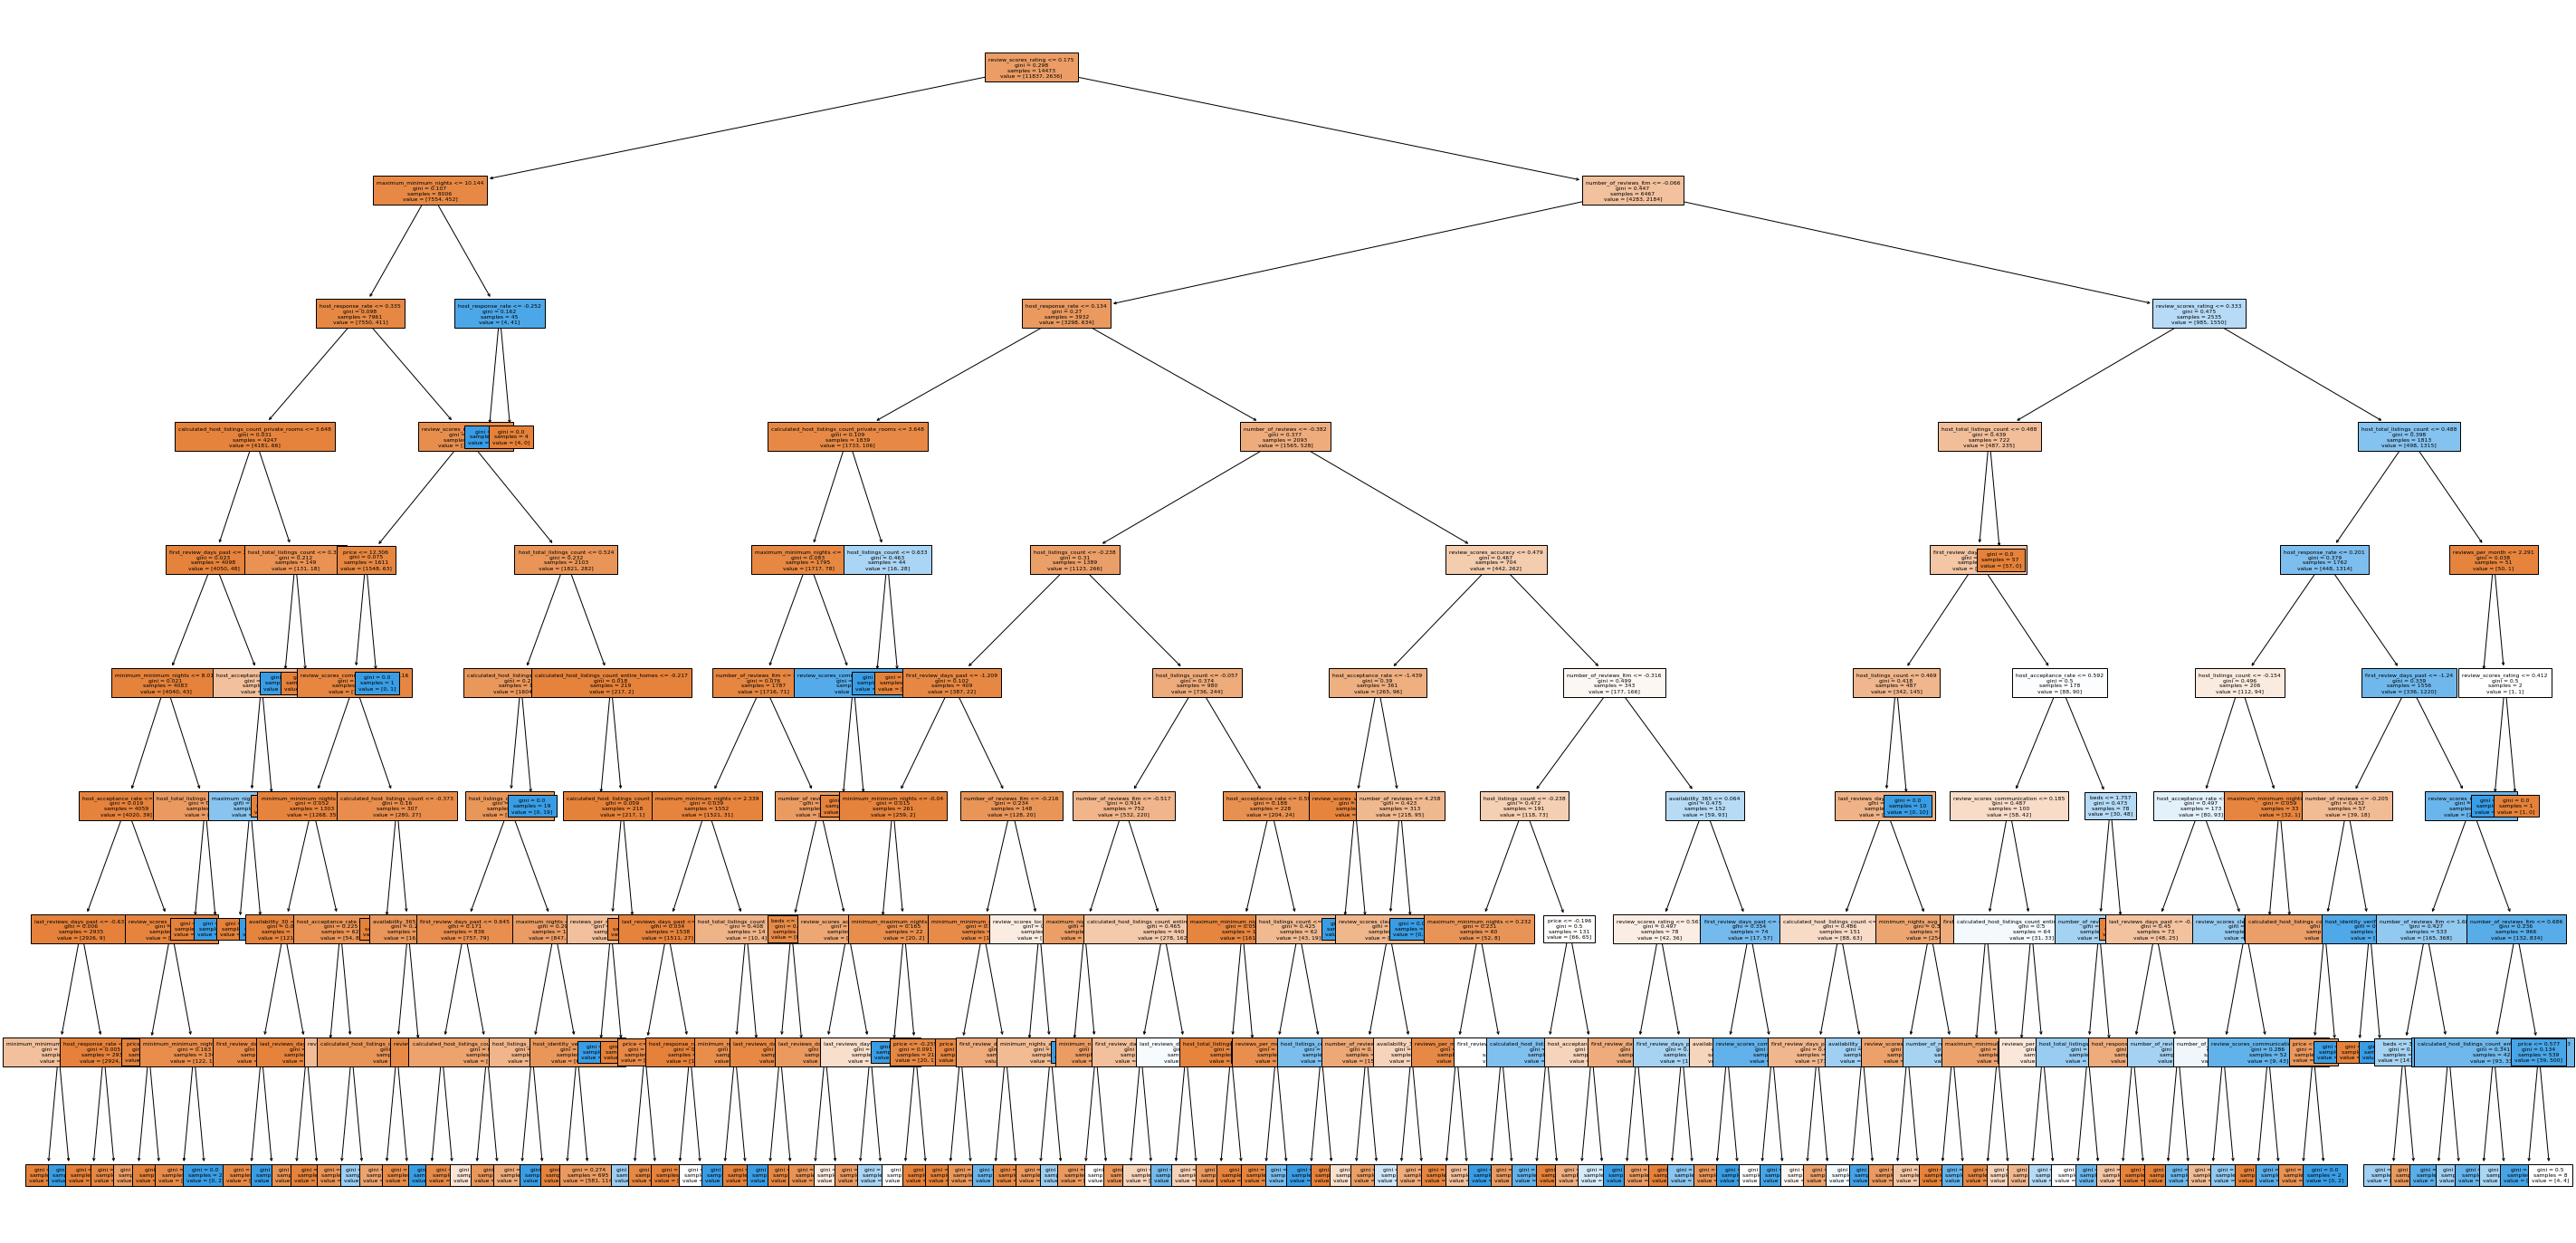

In [43]:
output = listing_train["host_is_superhost"].value_counts().index.tolist()

plt.figure(figsize = (50,25))
plot_tree(dtc_high_model, feature_names = x.columns,fontsize=6,  filled = True)
plt.show()

###### test?

In [44]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      5075
         1.0       0.71      0.58      0.64      1128

    accuracy                           0.88      6203
   macro avg       0.81      0.76      0.78      6203
weighted avg       0.87      0.88      0.88      6203



In [45]:
metrics.confusion_matrix(y_test,y_pred) 

array([[4618,  457],
       [ 444,  684]])

In [46]:
cfm = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

In [47]:
cfm.index.name = "True"
cfm.columns.name = "Predicted"

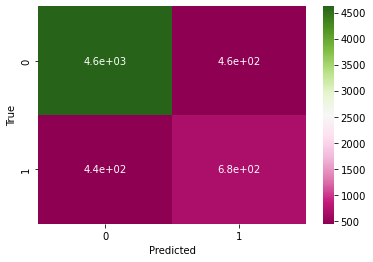

In [48]:
sns.heatmap(cfm, annot= True, cmap = "PiYG")
plt.show()

### 2.2.2. Random Forest

In [49]:
rfc_high = RandomForestClassifier(criterion = "entropy", n_estimators = 20, random_state = 0, max_depth = 5)

In [50]:
rfc_high_model = rfc_high.fit(x_train,y_train)

In [51]:
y_pred_rf = rfc_high_model.predict(x_test)

In [52]:
metrics.accuracy_score(y_pred_rf, y_test)

0.8715137836530711

In [53]:
tree1 = rfc_high_model.estimators_[1] #? how much number of estimators

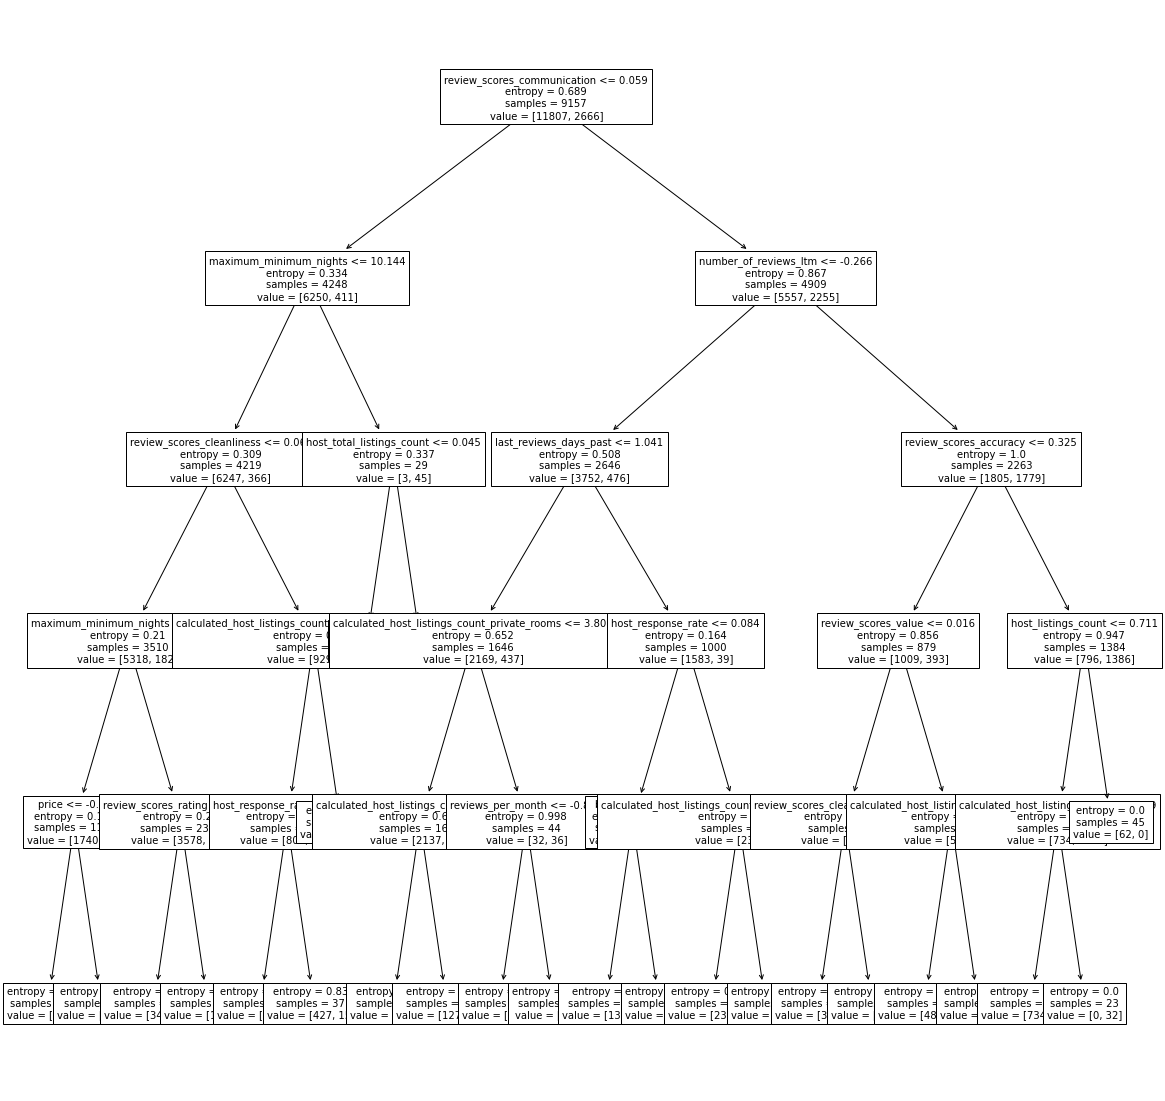

In [54]:
plt.figure(figsize = (20,20))
plot_tree(tree1, feature_names = x.columns, fontsize = 10)
plt.show()

In [55]:
fi = rfc_high_model.feature_importances_

In [56]:
pd.DataFrame(fi, index = x.columns, columns = ["Feature Importnace"])

,Feature Importnace
host_response_time,0.013664
host_response_rate,0.079866
host_acceptance_rate,0.035800
host_listings_count,0.013040
host_total_listings_count,0.023089
host_has_profile_pic,0.000000
host_identity_verified,0.003039
accommodates,0.000735
bedrooms,0.000055
beds,0.000619


In [57]:
nums = range(1,30)
for n in nums:
    rfc = RandomForestClassifier(criterion = "entropy", n_estimators = 30, random_state = 0, max_features = n)
    rfc_model = rfc.fit(x_train,y_train)
    y_pred_rfc = rfc_model.predict(x_test)
    score = metrics.accuracy_score(y_test,y_pred_rfc)
    print(n, score)
    
    #19 is best option for max_features

1 0.8927938094470418
2 0.8919877478639368
3 0.8955344188295986
4 0.8937610833467677
5 0.8974689666290505
6 0.8968241173625665
7 0.8929550217636627
8 0.8932774463969048
9 0.8995647267451233
10 0.8976301789456714
11 0.8952119941963566
12 0.8992423021118814
13 0.8985974528453974
14 0.8997259390617444
15 0.8955344188295986
16 0.8971465419958085
17 0.8995647267451233
18 0.8984362405287764
19 0.9014992745445752
20 0.8960180557794616
21 0.9002095760116073
22 0.8984362405287764
23 0.8960180557794616
24 0.8966629050459455
25 0.8992423021118814
26 0.8971465419958085
27 0.8992423021118814
28 0.8956956311462195
29 0.8955344188295986


##### best model

In [132]:
rfc_high2 = RandomForestClassifier(criterion = "entropy", n_estimators = 33, random_state = 0, max_features = 19)

In [133]:
rfc_high_model2 = rfc_high2.fit(x_train, y_train)

In [134]:
y_pred_rf2 = rfc_high_model2.predict(x_test)

###### accuracy test

In [135]:
metrics.accuracy_score(y_pred_rf2, y_test)

0.9019829114944382

### 2.2.3. Artificial Neural Network

In [62]:
sizes = range(1,30)

In [63]:
for s in sizes:
    mlp = MLPClassifier(activation = "relu", hidden_layer_sizes = (s), max_iter = 3000, random_state=0)
    scores = cross_val_score(mlp,scaled_x,y, cv = 5)
    mean = np.mean(scores)
    std = np.std(scores)
    print(s, ":", mean, "(", std, ")")
    
    #after 9 all value are approximately same so 8 is best option in single layer.

1 : 0.8461992613884867 ( 0.028612123619795007 )
2 : 0.8377348857116795 ( 0.041018016526633186 )
3 : 0.8717839058469125 ( 0.017716796143249627 )
4 : 0.8707198070909513 ( 0.010036831660740729 )
5 : 0.8611922331187042 ( 0.018615199832303673 )
6 : 0.8718807930601391 ( 0.012224011877669947 )
7 : 0.8734282870902028 ( 0.010627496243624732 )
8 : 0.8717839643183748 ( 0.010508685008693076 )
9 : 0.87381550850292 ( 0.012127724762053494 )
10 : 0.8676730930701961 ( 0.01438983616687484 )
11 : 0.869849763424463 ( 0.016213057732169613 )
12 : 0.8695107108024857 ( 0.013943529471857615 )
13 : 0.8699944218224853 ( 0.010347720352792682 )
14 : 0.8691723130608875 ( 0.012879006520084989 )
15 : 0.8673354203747319 ( 0.0160246786119384 )
16 : 0.867189323578734 ( 0.013091165673261745 )
17 : 0.8732835585264256 ( 0.010021336830108595 )
18 : 0.8621604620648846 ( 0.019036444134430952 )
19 : 0.8574209290413721 ( 0.021440964172718242 )
20 : 0.8637565692688026 ( 0.018637090859360085 )
21 : 0.8647712947218981 ( 0.01222901

In [64]:
sizes2 = range(1,6)

In [65]:
for d in sizes2:
    for a in sizes2:
        for s in sizes2:
            mlp = MLPClassifier(activation = "relu", hidden_layer_sizes = (d,a,s), max_iter = 3000, random_state=0)
            scores = cross_val_score(mlp,scaled_x,y, cv = 5)
            mean = np.mean(scores)
            std = np.std(scores)
            print(d,",",a,",",s, ":", mean, "(", std, ")")

1 , 1 , 1 : 0.8179531830694711 ( 9.389373870649302e-05 )
1 , 1 , 2 : 0.8179531830694711 ( 9.389373870649302e-05 )
1 , 1 , 3 : 0.8179531830694711 ( 9.389373870649302e-05 )
1 , 1 , 4 : 0.8453769421296243 ( 0.025607928562025855 )
1 , 1 , 5 : 0.8474568188250042 ( 0.027397723791428064 )
1 , 2 , 1 : 0.8343976971599242 ( 0.023284639126254496 )
1 , 2 , 2 : 0.844554821673734 ( 0.027078698943775775 )
1 , 2 , 3 : 0.8458124258874214 ( 0.024138285581316518 )
1 , 2 , 4 : 0.844216412237843 ( 0.02622399053682288 )
1 , 2 , 5 : 0.8447484089915076 ( 0.02641198819512152 )
1 , 3 , 1 : 0.8179531830694711 ( 9.389373870649302e-05 )
1 , 3 , 2 : 0.8476016409431212 ( 0.02017199768480505 )
1 , 3 , 3 : 0.8429104404304436 ( 0.02792738655127984 )
1 , 3 , 4 : 0.8179531830694711 ( 9.389373870649302e-05 )
1 , 3 , 5 : 0.8427654312036468 ( 0.027741376877370154 )
1 , 4 , 1 : 0.8460058260965153 ( 0.025745823715116058 )
1 , 4 , 2 : 0.8179531830694711 ( 9.389373870649302e-05 )
1 , 4 , 3 : 0.8179048271700513 ( 0.0001394289184

in 3-hidden-layer, (4,5,2) has highes scores then (7) sigle-hidden-layer

##### best model

In [66]:
mlp_high = MLPClassifier(activation = "relu", hidden_layer_sizes = (4,5,2), max_iter = 3000, random_state=0)

In [67]:
mlp_high_model = mlp_high.fit(x_train, y_train)

In [68]:
y_pred_mlp = mlp_high_model.predict(x_test)

###### accuracy test

In [69]:
metrics.accuracy_score(y_pred_mlp, y_test)

0.8805416733838465

### 2.2.4 SVM 

In [34]:
params = {
    "C" : [0.001, 0.01, 1, 10],
    "gamma" : [0.001, 0.01, 1, 10]
}

In [35]:
grid = GridSearchCV(SVC(kernel = "rbf"), params, cv = 2)

In [36]:
grid_model = grid.fit(x_train, y_train)

In [37]:
grid_model.best_params_

{'C': 10, 'gamma': 0.01}

In [38]:
grid_model.best_score_

0.8823326617644891

#### best model

In [39]:
nlsvc = SVC(kernel = "rbf", C = 10, gamma = 0.01)

In [40]:
nlsvc_model = nlsvc.fit(x_train,y_train)

In [41]:
y_pred_svm = nlsvc_model.predict(x_test)

In [42]:
metrics.accuracy_score(y_test,y_pred_svm)

0.8798968241173626

## Summary Model Final

In [33]:
models = []

lr = LogisticRegression()
models.append(("LR", lr))

dtc = DecisionTreeClassifier(criterion = "gini", max_depth = 9) 
models.append(("DT", dtc))

rfc = RandomForestClassifier(criterion = "entropy",n_estimators = 33, random_state = 0,max_features = 19)
models.append(("RF", rfc))

nnc = MLPClassifier(activation = "relu", hidden_layer_sizes = (4,5,2), max_iter = 3000, random_state = 0 )
models.append(("ANN", nnc))

svm = SVC(kernel = "rbf", C = 10, gamma = 0.01)
models.append(("SVM", svm))

In [34]:
models

[('LR', LogisticRegression()),
 ('DT', DecisionTreeClassifier(max_depth=9)),
 ('RF',
  RandomForestClassifier(criterion='entropy', max_features=19, n_estimators=33,
                         random_state=0)),
 ('ANN',
  MLPClassifier(hidden_layer_sizes=(4, 5, 2), max_iter=3000, random_state=0)),
 ('SVM', SVC(C=10, gamma=0.01))]

In [35]:
for name, model in models:
    scores = cross_val_score(model, scaled_x, y, cv=5)
    mean = np.mean(scores)
    std = np.std(scores)
    print(name, ": ", mean, "(", std, ")")

C:\Users\winne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\winne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR :  0.8496811901983119 ( 0.02175474894787541 )
DT :  0.8197010237183641 ( 0.07435945146535254 )
RF :  0.8781203295919393 ( 0.016447052897851467 )
ANN :  0.8727512577211567 ( 0.015221317956158605 )
SVM :  0.8691239805500528 ( 0.017494865588051918 )


## 2.3. Best Model

In [77]:
metrics.accuracy_score(y_pred_mlp, y_test)

0.8805416733838465

In [78]:
metrics.accuracy_score(y_pred_rf2, y_test)

0.9019829114944382

In [79]:
metrics.accuracy_score(y_pred_dtc, y_test)

0.8805416733838465

In [127]:
metrics.accuracy_score(y_pred_svm, y_test)

0.8860228921489601

So we select Random Forest is the best model to forecast "host_is_superhost" of test.xlsx

In [80]:
best = RandomForestClassifier(criterion = "entropy", n_estimators = 30, random_state = 0, max_features = 29)

# 3. Applying "test.xlsx"
## 3.1. Load Data

In [81]:
test_raw = pd.read_excel("test.xlsx")
test_raw.head(2)

,No,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,NaN,within an hour,100%,72%,1,1,t,t,Entire condo,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Shower gel"", ""Hangers"", ""43\"" HDTV"", ""Cookin...",$68.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,22,52,82,357,2022-09-20,6,6,1,2022-04-16,2022-09-12,5.0,4.83,5.0,5.0,5.0,5.0,5.0,f,1,1,0,0,1.14
1,2,NaN,within an hour,100%,100%,21,21,t,t,Entire serviced apartment,Entire home/apt,5,NaN,2 baths,2.0,3.0,"[""Hot water kettle"", ""Shower gel"", ""Hangers"", ...",$95.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,8,18,46,317,2022-09-20,2,2,0,2022-05-31,2022-08-06,5.0,5.00,5.0,5.0,5.0,5.0,5.0,t,21,21,0,0,0.53


## 3.2. Drop Useless Columns

In [82]:
test_drop = test_raw[['host_is_superhost','host_response_time','host_response_rate', 'host_acceptance_rate', 
                        'host_listings_count','host_total_listings_count','host_has_profile_pic','host_identity_verified', 
                        'accommodates','bathrooms', 'bedrooms','beds','price',
                        'minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                        'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                        'has_availability','availability_30','availability_60','availability_90','availability_365',
                        'calendar_last_scraped','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d',
                        'first_review','last_review','review_scores_rating','review_scores_accuracy',
                        'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                        'review_scores_location','review_scores_value','instant_bookable','calculated_host_listings_count',
                        'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms','reviews_per_month' ]]
test_drop.head(2)

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,within an hour,100%,72%,1,1,t,t,5,NaN,2.0,3.0,$68.00,2,1125,2,2,1125,1125,2.0,1125.0,t,22,52,82,357,2022-09-20,6,6,1,2022-04-16,2022-09-12,5.0,4.83,5.0,5.0,5.0,5.0,5.0,f,1,1,0,0,1.14
1,NaN,within an hour,100%,100%,21,21,t,t,5,NaN,2.0,3.0,$95.00,1,1125,1,1,1125,1125,1.0,1125.0,t,8,18,46,317,2022-09-20,2,2,0,2022-05-31,2022-08-06,5.0,5.00,5.0,5.0,5.0,5.0,5.0,t,21,21,0,0,0.53


## 3.3. Categorical to Numerical

In [83]:
test_drop['host_is_superhost'].replace(['f', 't'],
        [0,1], inplace=True)

test_drop['host_has_profile_pic'].replace(['f', 't'],
        [0,1], inplace=True)

test_drop['host_identity_verified'].replace(['f', 't'],
        [0,1], inplace=True)

test_drop['has_availability'].replace(['f', 't'],
        [0,1], inplace=True)

test_drop['instant_bookable'].replace(['f', 't'],
        [0,1], inplace=True)

test_drop['host_response_time'].replace(['within a day', 'within a few hours','within an hour','a few days or more'],
        [0,1,2,3], inplace=True)

test_drop.head(2)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,2.0,100%,72%,1,1,1,1,5,NaN,2.0,3.0,$68.00,2,1125,2,2,1125,1125,2.0,1125.0,1,22,52,82,357,2022-09-20,6,6,1,2022-04-16,2022-09-12,5.0,4.83,5.0,5.0,5.0,5.0,5.0,0,1,1,0,0,1.14
1,NaN,2.0,100%,100%,21,21,1,1,5,NaN,2.0,3.0,$95.00,1,1125,1,1,1125,1125,1.0,1125.0,1,8,18,46,317,2022-09-20,2,2,0,2022-05-31,2022-08-06,5.0,5.00,5.0,5.0,5.0,5.0,5.0,1,21,21,0,0,0.53


## 3.4. Datatype

In [84]:
data = {'column name' : test_drop.columns, 'dtypes' : test_drop.dtypes.to_list()}
df = pd.DataFrame(data)
print(df)

                                     column name   dtypes
0                              host_is_superhost  float64
1                             host_response_time  float64
2                             host_response_rate   object
3                           host_acceptance_rate   object
4                            host_listings_count    int64
5                      host_total_listings_count    int64
6                           host_has_profile_pic    int64
7                         host_identity_verified    int64
8                                   accommodates    int64
9                                      bathrooms  float64
10                                      bedrooms  float64
11                                          beds  float64
12                                         price   object
13                                minimum_nights    int64
14                                maximum_nights    int64
15                        minimum_minimum_nights    int64
16            

In [85]:
test_drop["host_response_rate"] = test_drop["host_response_rate"].str.strip("%")
test_drop["host_acceptance_rate"] = test_drop["host_acceptance_rate"].str.strip("%")

/var/folders/pz/68wjcml10n5d96btqvh7d7pm0000gn/T/ipykernel_7909/994617847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop["host_response_rate"] = test_drop["host_response_rate"].str.strip("%")
/var/folders/pz/68wjcml10n5d96btqvh7d7pm0000gn/T/ipykernel_7909/994617847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop["host_acceptance_rate"] = test_drop["host_acceptance_rate"].str.strip("%")


In [86]:
test_drop["host_response_rate"] = test_drop["host_response_rate"].astype(float)
test_drop["host_acceptance_rate"] = test_drop["host_acceptance_rate"].astype(float)

/var/folders/pz/68wjcml10n5d96btqvh7d7pm0000gn/T/ipykernel_7909/3890814357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop["host_response_rate"] = test_drop["host_response_rate"].astype(float)
/var/folders/pz/68wjcml10n5d96btqvh7d7pm0000gn/T/ipykernel_7909/3890814357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop["host_acceptance_rate"] = test_drop["host_acceptance_rate"].astype(float)


In [87]:
import re 
def re_sub(x):
    for i in x:
        return float(re.sub(r'[$,]',"",str(x)))  
test_drop["price"] =  test_drop["price"].apply(re_sub)

/var/folders/pz/68wjcml10n5d96btqvh7d7pm0000gn/T/ipykernel_7909/2533666044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop["price"] =  test_drop["price"].apply(re_sub)


In [88]:
test_drop['calendar_last_scraped'] = pd.to_datetime(test_drop['calendar_last_scraped'])
today = pd.to_datetime('today').normalize()


days=[]
for i in range(0,len(test_drop['calendar_last_scraped'])):
    delta= today - test_drop['calendar_last_scraped'][i]
    days.append(delta)

test_drop = pd.concat([test_drop, pd.DataFrame(days, columns=["calendar_last_scraped_days_past"])], axis=1)
test_drop["calendar_last_scraped_days_past"]= test_drop["calendar_last_scraped_days_past"].astype('timedelta64[D]')
test_drop.drop(['calendar_last_scraped'], axis=1, inplace = True)

/var/folders/pz/68wjcml10n5d96btqvh7d7pm0000gn/T/ipykernel_7909/3194553164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop['calendar_last_scraped'] = pd.to_datetime(test_drop['calendar_last_scraped'])


In [89]:
test_drop['first_review'] = pd.to_datetime(test_drop['first_review'])
today = pd.to_datetime('today').normalize()


days=[]
for i in range(0,len(test_drop['first_review'])):
    delta= today - test_drop['first_review'][i]
    days.append(delta)

test_drop = pd.concat([test_drop, pd.DataFrame(days, columns=["first_review_days_past"])], axis=1)
test_drop["first_review_days_past"]= test_drop["first_review_days_past"].astype('timedelta64[D]')
test_drop.drop(['first_review'], axis=1, inplace = True)

In [90]:
test_drop['last_review'] = pd.to_datetime(test_drop['last_review'])
today = pd.to_datetime('today').normalize()


days=[]
for i in range(0,len(test_drop['last_review'])):
    delta= today - test_drop['last_review'][i]
    days.append(delta)

test_drop = pd.concat([test_drop, pd.DataFrame(days, columns=["last_reviews_days_past"])], axis=1)
test_drop["last_reviews_days_past"]= test_drop["last_reviews_days_past"].astype('timedelta64[D]')
test_drop.drop(['last_review'], axis=1, inplace = True)

test_drop.head()

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calendar_last_scraped_days_past,first_review_days_past,last_reviews_days_past
0,NaN,2.0,100.0,72.0,1,1,1,1,5,NaN,2.0,3.0,68.0,2,1125,2,2,1125,1125,2.0,1125.0,1,22,52,82,357,6,6,1,5.00,4.83,5.00,5.0,5.0,5.00,5.00,0,1,1,0,0,1.14,77.0,234.0,85.0
1,NaN,2.0,100.0,100.0,21,21,1,1,5,NaN,2.0,3.0,95.0,1,1125,1,1,1125,1125,1.0,1125.0,1,8,18,46,317,2,2,0,5.00,5.00,5.00,5.0,5.0,5.00,5.00,1,21,21,0,0,0.53,77.0,189.0,122.0
2,NaN,2.0,100.0,100.0,6,6,1,1,4,NaN,1.0,3.0,61.0,2,1125,2,2,1125,1125,2.0,1125.0,1,25,55,85,360,13,8,0,4.92,5.00,4.92,5.0,5.0,4.75,4.83,0,6,6,0,0,0.83,77.0,548.0,136.0
3,NaN,2.0,100.0,100.0,2,2,1,1,2,NaN,1.0,1.0,77.0,2,240,2,2,240,240,2.0,240.0,1,25,55,85,175,5,5,2,4.80,4.80,5.00,5.0,5.0,4.20,5.00,0,2,2,0,0,1.63,77.0,168.0,78.0
4,NaN,2.0,90.0,90.0,4,5,1,1,6,NaN,1.0,3.0,42.0,2,700,2,2,1125,1125,2.0,1125.0,1,24,54,84,359,2,2,1,4.50,5.00,5.00,5.0,4.5,4.50,5.00,1,2,2,0,0,0.90,77.0,143.0,86.0


## 3.5. Missing Value Check

In [91]:
test_drop.isnull().sum()

host_is_superhost                               140
host_response_time                               36
host_response_rate                               36
host_acceptance_rate                             30
host_listings_count                               0
host_total_listings_count                         0
host_has_profile_pic                              0
host_identity_verified                            0
accommodates                                      0
bathrooms                                       140
bedrooms                                          8
beds                                              3
price                                             0
minimum_nights                                    0
maximum_nights                                    0
minimum_minimum_nights                            0
maximum_minimum_nights                            0
minimum_maximum_nights                            0
maximum_maximum_nights                            0
minimum_nigh

In [92]:
hrr_mean = test_drop["host_response_time"].mean()
test_drop["host_response_time"].fillna(hrr_mean, inplace = True)

hrr2_mean = test_drop["host_response_rate"].mean()
test_drop["host_response_rate"].fillna(hrr2_mean, inplace = True)

har_mean = test_drop["host_acceptance_rate"].mean()
test_drop["host_acceptance_rate"].fillna(har_mean, inplace = True)

bedr_mean = test_drop["bedrooms"].mean()
test_drop["bedrooms"].fillna(bedr_mean, inplace = True)

beds_mean = test_drop["beds"].mean()
test_drop["beds"].fillna(beds_mean, inplace = True)

rsr_mean = test_drop["review_scores_rating"].mean()
test_drop["review_scores_rating"].fillna(rsr_mean, inplace = True)

rsa_mean = test_drop["review_scores_accuracy"].mean()
test_drop["review_scores_accuracy"].fillna(rsa_mean, inplace = True)

rsc_mean = test_drop["review_scores_cleanliness"].mean()
test_drop["review_scores_cleanliness"].fillna(rsc_mean, inplace = True)

rsci_mean = test_drop["review_scores_checkin"].mean()
test_drop["review_scores_checkin"].fillna(rsci_mean, inplace = True)
                                              
rscm_mean = test_drop["review_scores_communication"].mean()
test_drop["review_scores_communication"].fillna(rscm_mean, inplace = True)
                                              
rsl_mean = test_drop["review_scores_location"].mean()
test_drop["review_scores_location"].fillna(rsl_mean, inplace = True)
                                              
rsv_mean = test_drop["review_scores_value"].mean()
test_drop["review_scores_value"].fillna(rsv_mean, inplace = True)
                                              
rpm_mean = test_drop["reviews_per_month"].mean()
test_drop["reviews_per_month"].fillna(rpm_mean, inplace = True)
                                              
frdp_mean = test_drop["first_review_days_past"].mean()
test_drop["first_review_days_past"].fillna(frdp_mean, inplace = True)
                                              
lrdp_mean = test_drop["last_reviews_days_past"].mean()
test_drop["last_reviews_days_past"].fillna(lrdp_mean, inplace = True)

In [93]:
test_drop.isnull().sum()

host_is_superhost                               140
host_response_time                                0
host_response_rate                                0
host_acceptance_rate                              0
host_listings_count                               0
host_total_listings_count                         0
host_has_profile_pic                              0
host_identity_verified                            0
accommodates                                      0
bathrooms                                       140
bedrooms                                          0
beds                                              0
price                                             0
minimum_nights                                    0
maximum_nights                                    0
minimum_minimum_nights                            0
maximum_minimum_nights                            0
minimum_maximum_nights                            0
maximum_maximum_nights                            0
minimum_nigh

"bathroom" has no value, so drop it

In [94]:
test = test_drop.drop(labels = ["bathrooms"], axis = 1)
test.head(2)

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calendar_last_scraped_days_past,first_review_days_past,last_reviews_days_past
0,NaN,2.0,100.0,72.0,1,1,1,1,5,2.0,3.0,68.0,2,1125,2,2,1125,1125,2.0,1125.0,1,22,52,82,357,6,6,1,5.0,4.83,5.0,5.0,5.0,5.0,5.0,0,1,1,0,0,1.14,77.0,234.0,85.0
1,NaN,2.0,100.0,100.0,21,21,1,1,5,2.0,3.0,95.0,1,1125,1,1,1125,1125,1.0,1125.0,1,8,18,46,317,2,2,0,5.0,5.00,5.0,5.0,5.0,5.0,5.0,1,21,21,0,0,0.53,77.0,189.0,122.0


## 3.6. Defining Y & X

In [95]:
y_t = test.iloc[:, 0]
x_t = test.iloc[:, 1:]

## 3.7. Scaling Test X

In [96]:
scaler_model_t = scaler.fit(x_t)

In [97]:
scaled_x_t = scaler_model.transform(x_t)

In [98]:
best = RandomForestClassifier(criterion = "entropy", n_estimators = 30, random_state = 0, max_features = 29)

In [99]:
best_model = best.fit(scaled_x, y)

In [100]:
y_pred_best = best_model.predict(scaled_x_t)

In [101]:
test["host_is_superhost"] = y_pred_best

In [102]:
test.head(3)

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calendar_last_scraped_days_past,first_review_days_past,last_reviews_days_past
0,0.0,2.0,100.0,72.0,1,1,1,1,5,2.0,3.0,68.0,2,1125,2,2,1125,1125,2.0,1125.0,1,22,52,82,357,6,6,1,5.00,4.83,5.00,5.0,5.0,5.00,5.00,0,1,1,0,0,1.14,77.0,234.0,85.0
1,0.0,2.0,100.0,100.0,21,21,1,1,5,2.0,3.0,95.0,1,1125,1,1,1125,1125,1.0,1125.0,1,8,18,46,317,2,2,0,5.00,5.00,5.00,5.0,5.0,5.00,5.00,1,21,21,0,0,0.53,77.0,189.0,122.0
2,1.0,2.0,100.0,100.0,6,6,1,1,4,1.0,3.0,61.0,2,1125,2,2,1125,1125,2.0,1125.0,1,25,55,85,360,13,8,0,4.92,5.00,4.92,5.0,5.0,4.75,4.83,0,6,6,0,0,0.83,77.0,548.0,136.0


In [103]:
test['host_is_superhost'].replace([0, 1], ['f','t'], inplace=True)

In [104]:
test.head(3)

,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,calendar_last_scraped_days_past,first_review_days_past,last_reviews_days_past
0,f,2.0,100.0,72.0,1,1,1,1,5,2.0,3.0,68.0,2,1125,2,2,1125,1125,2.0,1125.0,1,22,52,82,357,6,6,1,5.00,4.83,5.00,5.0,5.0,5.00,5.00,0,1,1,0,0,1.14,77.0,234.0,85.0
1,f,2.0,100.0,100.0,21,21,1,1,5,2.0,3.0,95.0,1,1125,1,1,1125,1125,1.0,1125.0,1,8,18,46,317,2,2,0,5.00,5.00,5.00,5.0,5.0,5.00,5.00,1,21,21,0,0,0.53,77.0,189.0,122.0
2,t,2.0,100.0,100.0,6,6,1,1,4,1.0,3.0,61.0,2,1125,2,2,1125,1125,2.0,1125.0,1,25,55,85,360,13,8,0,4.92,5.00,4.92,5.0,5.0,4.75,4.83,0,6,6,0,0,0.83,77.0,548.0,136.0


In [105]:
test.to_excel("test_result.xlsx")